<a href="https://colab.research.google.com/github/g8428/TIL/blob/master/220308_nlp_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

import tensorflow_datasets as tfds

tf.random.set_seed(42)

In [ ]:
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIHB2P9/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIHB2P9/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIHB2P9/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
sample_string = 'Tensorflow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
tokenized_string

[6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]

In [ ]:
for token in tokenized_string:
    print("{} -> {}".format(token, tokenizer.decode([token])))

6307 -> Ten
2327 -> sor
2934 -> flow
2 -> , 
48 -> from 
4249 -> basi
4429 -> cs 
7 -> to 
2652 -> master
8050 -> y


In [ ]:
original_string = tokenizer.decode(tokenized_string)
original_string

'Tensorflow, from basics to mastery'

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

embedding_dim = 16
max_length = 120

model = Sequential()
model.add(Embedding(tokenizer.vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           130960    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

hist = model.fit(train_dataset, epochs = num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 11s 27ms/step - loss: 0.1335 - accuracy: 0.9550 - val_loss: 0.3557 - val_accuracy: 0.8755
Epoch 2/10
391/391 [==============================] - 11s 27ms/step - loss: 0.1279 - accuracy: 0.9581 - val_loss: 0.3763 - val_accuracy: 0.8700
Epoch 3/10
391/391 [==============================] - 9s 21ms/step - loss: 0.1244 - accuracy: 0.9585 - val_loss: 0.3693 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 9s 21ms/step - loss: 0.1202 - accuracy: 0.9606 - val_loss: 0.3863 - val_accuracy: 0.8708
Epoch 5/10
391/391 [==============================] - 9s 20ms/step - loss: 0.1149 - accuracy: 0.9636 - val_loss: 0.3911 - val_accuracy: 0.8710
Epoch 6/10
391/391 [==============================] - 11s 27ms/step - loss: 0.1117 - accuracy: 0.9641 - val_loss: 0.4049 - val_accuracy: 0.8688
Epoch 7/10
391/391 [==============================] - 9s 20ms/step - loss: 0.1078 - accuracy: 0.9662 - val_loss: 0.4094 - val_accuracy: 0.8

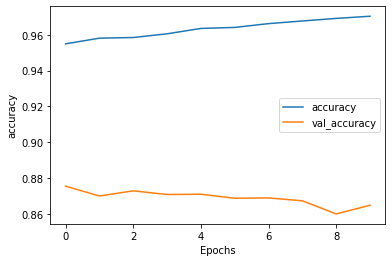

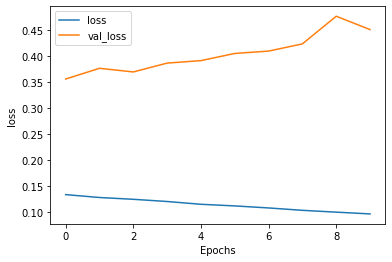

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
    plt.plot(hist.history[string])
    plt.plot(hist.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')

In [ ]:
from tensorflow.keras.layers import LSTM

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    LSTM(units=64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          130960    
                                                                 
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 153,809
Trainable params: 153,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 448s 1s/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 445s 1s/step - loss: 0.6929 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
391/391 [==============================] - 461s 1s/step - loss: 0.6957 - accuracy: 0.5026 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/10
391/391 [==============================] - 472s 1s/step - loss: 0.6902 - accuracy: 0.5032 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/10
391/391 [==============================] - 454s 1s/step - loss: 0.6888 - accuracy: 0.4998 - val_loss: 0.6953 - val_accuracy: 0.5001
Epoch 6/10
391/391 [==============================] - 463s 1s/step - loss: 0.6874 - accuracy: 0.5047 - val_loss: 0.6961 - val_accuracy: 0.5027
Epoch 7/10
391/391 [==============================] - 458s 1s/step - loss: 0.6869 - accuracy: 0.5029 - val_loss: 0.6946 - val_accuracy: 0.5005

# Simple RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    SimpleRNN(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

#GRU

In [ ]:
from tensorflow.keras.layers import GRU

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    GRU(64),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

#Bidirctional

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    Bidirectional(LSTM(64)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

# Stacking

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
                    Embedding(tokenizer.vocab_size, embedding_dim),
                    Bidirectional(LSTM(64, return_sequences=True)),
                    Bidirectional(LSTM(64)),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

# CNN 논문 구현

In [ ]:
import numpy as np; np.random.seed(1234)
import pandas as pd


ntrain = 150000

data = pd.read_csv('../ratings.txt', sep='\t', quoting=3)
data = pd.DataFrame(np.random.permutation(data))
trn, tst = data[:ntrain], data[ntrain:]

header = 'id document label'.split()
trn.to_csv('../ratings_train.txt', sep='\t', index=False, header=header)
tst.to_csv('../ratings_test.txt', sep='\t', index=False, header=header)